In [4]:
!pip install pingouin

zsh:1: command not found: pip


In [2]:
pip install --upgrade pingouin

     |████████████████████████████████| 185 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 36.6 MB 86 kB/s  eta 0:00:01
     |████████████████████████████████| 9.6 MB 9.6 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 30.5 MB/s eta 0:00:01
     |████████████████████████████████| 40 kB 32.8 MB/s eta 0:00:01
     |████████████████████████████████| 927 kB 85.8 MB/s eta 0:00:01
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196191 sha256=a4f4c8cb94dff665aa482d2995afd0d09c401c62692998e3a00068f1260740b9
  Stored in directory: /Users/wenqijiang/Library/Caches/pip/wheels/75/b0/89/f6866fc5accea9bec04f4c9f2a242520d6e8e7b8fcf89e139c
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7049 sha256=66df4a28094067107970e472321dfc5a137b2a96e48dca58a54b0fd3b42c661c
  Stored in directory: /Users/wenqijiang/Library/Caches/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built pi

# Import and load data (in module)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import random
import math
import scipy.stats as stats
import pingouin as pg
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import mean_squared_error

ImportError: cannot import name 'studentized_range' from 'scipy.stats' (/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/__init__.py)

In [ ]:
#path_fat_quantity = '/content/Fat_Supply_Quantity_Data.csv'
#path_food_quantity = '/content/Food_Supply_Quantity_kg_Data.csv'
#path_food_kcal = '/content/Food_Supply_kcal_Data.csv'
#path_protein_quantity = '/content/Protein_Supply_Quantity_Data.csv'
#path_food_description = '/content/Supply_Food_Data_Descriptions.csv'

In [7]:
from module_path import path
path_fat_quantity = path.path_fat_quantity

ModuleNotFoundError: No module named 'module_path'

# Actual code

### Q1: What are the top three factors contributing to people getting COVID-19 in terms of diet? 

In [6]:
# read all data
def q_1(files):
df_food_supply = pd.read_csv(path_food_quantity)
num_row, num_col = df_food_supply.shape

df_food_supply_sp = df_food_supply.sample(n=136)

Text(0.5, 1.0, 'Random Sample Correlation Map')

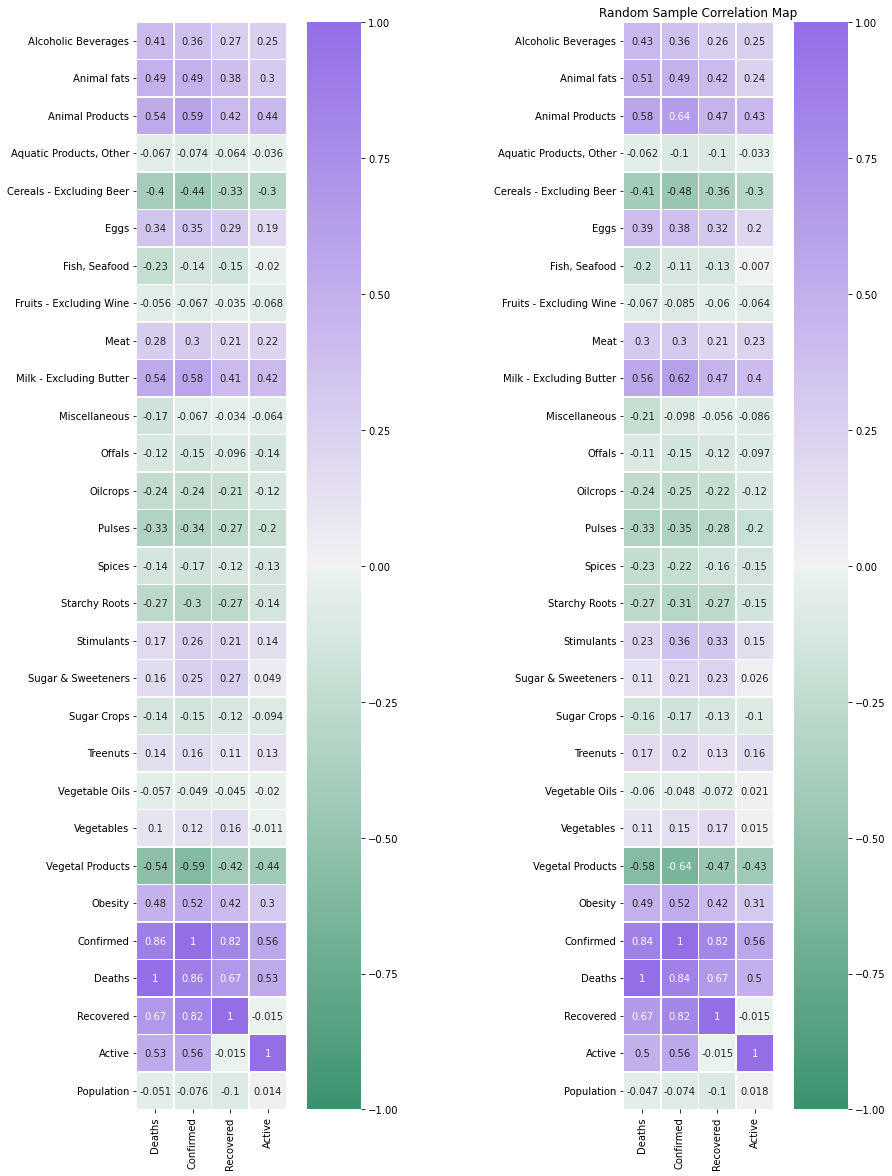

In [7]:
f, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(16, 20))

# find the pairwise correlation between all columns of the dataframe
corrs = df_food_supply.corr(method='pearson').round(3)
corrs = corrs[['Deaths', 'Confirmed', 'Recovered', 'Active']]

# set up color map
cmap = sns.diverging_palette(150, 275, s=80, l=55, as_cmap=True)

# draw a heatmap
sns.heatmap(ax=ax1, data=corrs, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True)


# test code
# find the pairwise correlation between all columns of the dataframe
corrs_sp = df_food_supply_sp.corr(method='pearson').round(3)
corrs_sp = corrs_sp[['Deaths', 'Confirmed', 'Recovered', 'Active']]

# set up color map
cmap_sp = sns.diverging_palette(150, 275, s=80, l=55, as_cmap=True)

# draw a heatmap
sns.heatmap(ax=ax2, data=corrs_sp, cmap=cmap_sp, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True)
plt.title('Random Sample Correlation Map')

### Q2: Does intake of more fat or intake of more protein help people get away from COVID-19?
We can compare the data from fat and protein intake and see the difference in recovery rate to conclude this question.


In [ ]:
# read csv files
df_fat = pd.read_csv(path_fat_quantity)
df_protein = pd.read_csv(path_protein_quantity)

# plot the recovery rate over different countries
country_recover = px.bar(df_food_supply, x = "Country", y ="Recovered")
country_recover = country_recover.update_xaxes(categoryorder="total descending")
country_recover.show()

# Fat Intake
# find top 5 countries with higher recovered rate
recover_top5 = list(df_food_supply.nlargest(5, 'Recovered')['Country'])
df_top1_fat = df_fat[df_fat['Country'] == recover_top5[0]]
df_top2_fat = df_fat[df_fat['Country'] == recover_top5[1]]
df_top3_fat = df_fat[df_fat['Country'] == recover_top5[2]]
df_top4_fat = df_fat[df_fat['Country'] == recover_top5[3]]
df_top5_fat = df_fat[df_fat['Country'] == recover_top5[4]]

recover_top5_fat = df_fat.nlargest(5, 'Recovered')

ingredients = ['Alcoholic Beverages', 'Animal Products', 'Animal fats',
               'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
               'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
               'Milk - Excluding Butter', 'Offals', 'Oilcrops', 'Pulses',
               'Spices','Starchy Roots', 'Stimulants', 'Sugar Crops',
               'Sugar & Sweeteners', 'Treenuts', 'Vegetal Products',
               'Vegetable Oils', 'Vegetables', 'Miscellaneous']

# rearrange positions of figures
fig1 = make_subplots(
    rows=1, cols=5,
    specs=[[{"type": "pie"},
            {"type": "pie"},
            {"type": "pie"},
            {"type": "pie"},
            {"type": "pie"}]])

# draw pie charts about fat intakes of different countries
# Montenegro
fig1.add_trace(go.Pie(hole=.3,
                      labels=ingredients,
                      values=df_top1_fat[ingredients].mean().tolist()),
               row=1,
               col=1)
# Czechia
fig1.add_trace(go.Pie(hole=.3,
                      labels=ingredients,
                      values=df_top2_fat[ingredients].mean().tolist()),
               row=1,
               col=2)
# Luxembourg
fig1.add_trace(go.Pie(hole=.3,
                      labels=ingredients,
                      values=df_top3_fat[ingredients].mean().tolist()),
               row=1,
               col=3)
# Slovenia
fig1.add_trace(go.Pie(hole=.3,
                      labels=ingredients,
                      values=df_top4_fat[ingredients].mean().tolist()),
               row=1,
               col=4)
# Georgia
fig1.add_trace(go.Pie(hole=.3,
                      labels=ingredients,
                      values=df_top5_fat[ingredients].mean().tolist()),
               row=1,
               col=5)

# set up titles and height, width of the figures
fig1.update_layout(title_text='Fat intake distribution from each ingredient'
                   'of Countries with TOP5 Recovery Rate')

# Protein Intake
recover_top5 = list(df_food_supply.nlargest(5, 'Recovered')['Country'])
df_top1_pt = df_protein[df_protein['Country'] == recover_top5[0]]
df_top2_pt = df_protein[df_protein['Country'] == recover_top5[1]]
df_top3_pt = df_protein[df_protein['Country'] == recover_top5[2]]
df_top4_pt = df_protein[df_protein['Country'] == recover_top5[3]]
df_top5_pt = df_protein[df_protein['Country'] == recover_top5[4]]

recover_top5_protein = df_protein.nlargest(5, 'Recovered')

ingredients = ['Alcoholic Beverages', 'Animal Products', 'Animal fats',
               'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
               'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
               'Milk - Excluding Butter', 'Offals', 'Oilcrops', 'Pulses',
               'Spices','Starchy Roots', 'Stimulants', 'Sugar Crops',
               'Sugar & Sweeteners', 'Treenuts', 'Vegetal Products',
               'Vegetable Oils', 'Vegetables', 'Miscellaneous']

# rearrange positions of figures
fig2 = make_subplots(
    rows=1, cols=5,
    specs=[[{"type": "pie"},
            {"type": "pie"},
            {"type": "pie"},
            {"type": "pie"},
            {"type": "pie"}]])

# Protein intakes
# Montenegro
fig2.add_trace(go.Pie(hole=.3, labels=ingredients,
                      values=df_top1_pt[ingredients].mean().tolist()),
                      row=1, col=1)
# Czechia
fig2.add_trace(go.Pie(hole=.3, labels=ingredients,
                      values=df_top2_pt[ingredients].mean().tolist()),
                      row=1, col=2)
# Luxembourg
fig2.add_trace(go.Pie(hole=.3, labels=ingredients,
                      values=df_top3_pt[ingredients].mean().tolist()),
                      row=1, col=3)
# Slovenia
fig2.add_trace(go.Pie(hole=.3, labels=ingredients,
                      values=df_top4_pt[ingredients].mean().tolist()),
                      row=1, col=4)
# Georgia
fig2.add_trace(go.Pie(hole=.3, labels=ingredients,
                      values=df_top5_pt[ingredients].mean().tolist()),
                      row=1, col=5)

# set up titles and height, width of the figures
fig2.update_layout(title_text= 'Protein intake distribution from each'
                  ' ingredient of Countries with TOP5 Recovery Rate')

# show the figures
fig1.show()
fig2.show()


In [ ]:
df_fat.shape

(170, 32)

In [ ]:
# TOP 5 death rate
# plot the recovery rate over different countries
country_death = px.bar(df_food_supply, x = "Country", y ="Deaths")
country_death = country_death.update_xaxes(categoryorder="total descending")
country_death.show()

# Fat Intake
# find top 5 countries with higher recovered rate
deaths_top5_countries = list(df_food_supply.nlargest(5, 'Deaths')['Country'])
df_d_top1_fat = df_fat[df_fat['Country'] == deaths_top5_countries[0]]
df_d_top2_fat = df_fat[df_fat['Country'] == deaths_top5_countries[1]]
df_d_top3_fat = df_fat[df_fat['Country'] == deaths_top5_countries[2]]
df_d_top4_fat = df_fat[df_fat['Country'] == deaths_top5_countries[3]]
df_d_top5_fat = df_fat[df_fat['Country'] == deaths_top5_countries[4]]

recover_top5_fat = df_fat.nlargest(5, 'Deaths')

ingredients = ['Alcoholic Beverages', 'Animal Products', 'Animal fats',
               'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
               'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
               'Milk - Excluding Butter', 'Offals', 'Oilcrops', 'Pulses',
               'Spices','Starchy Roots', 'Stimulants', 'Sugar Crops',
               'Sugar & Sweeteners', 'Treenuts', 'Vegetal Products',
               'Vegetable Oils', 'Vegetables', 'Miscellaneous']

# rearrange positions of figures
fig3 = make_subplots(
    rows=1, cols=5,
    specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"},
            {"type": "pie"}, {"type": "pie"}]])

# draw pie charts about fat intakes of different countries
# Belgium
fig3.add_trace(go.Pie(hole=.3,
                      labels=ingredients,
                      values=df_d_top1_fat[ingredients].mean().tolist()),
               row=1,
               col=1)
# Slovenia
fig3.add_trace(go.Pie(hole=.3,
                      labels=ingredients,
                      values=df_d_top2_fat[ingredients].mean().tolist()),
               row=1,
               col=2)
# United Kingdom
fig3.add_trace(go.Pie(hole=.3,
                      labels=ingredients,
                      values=df_d_top3_fat[ingredients].mean().tolist()),
               row=1,
               col=3)
# Czechia
fig3.add_trace(go.Pie(hole=.3,
                      labels=ingredients,
                      values=df_d_top4_fat[ingredients].mean().tolist()),
               row=1,
               col=4)
# Italy
fig3.add_trace(go.Pie(hole=.3,
                      labels=ingredients,
                      values=df_d_top5_fat[ingredients].mean().tolist()),
               row=1,
               col=5)

# set up titles and height, width of the figures
fig3.update_layout(title_text= 'Fat intake distribution from each ingredient of'
                   ' Countries with TOP5 Deaths Rate')

# Protein Intake
deaths_top5_countries = list(df_food_supply.nlargest(5, 'Deaths')['Country'])
df_d_top1_pt = df_protein[df_protein['Country'] == deaths_top5_countries[0]]
df_d_top2_pt = df_protein[df_protein['Country'] == deaths_top5_countries[1]]
df_d_top3_pt = df_protein[df_protein['Country'] == deaths_top5_countries[2]]
df_d_top4_pt = df_protein[df_protein['Country'] == deaths_top5_countries[3]]
df_d_top5_pt = df_protein[df_protein['Country'] == deaths_top5_countries[4]]

ingredients = ['Alcoholic Beverages', 'Animal Products', 'Animal fats',
               'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
               'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
               'Milk - Excluding Butter', 'Offals', 'Oilcrops', 'Pulses',
               'Spices','Starchy Roots', 'Stimulants', 'Sugar Crops',
               'Sugar & Sweeteners', 'Treenuts', 'Vegetal Products',
               'Vegetable Oils', 'Vegetables', 'Miscellaneous']

# rearrange positions of figures
fig4 = make_subplots(
    rows=1, cols=5,
    specs=[[{"type": "pie"},
            {"type": "pie"},
            {"type": "pie"},
            {"type": "pie"},
            {"type": "pie"}]])

# Protein intakes
# Belgium
fig4.add_trace(go.Pie(hole=.3, labels=ingredients,
                      values=df_d_top1_pt[ingredients].mean().tolist()),
                      row=1, col=1)
# Slovenia
fig4.add_trace(go.Pie(hole=.3, labels=ingredients,
                      values=df_d_top2_pt[ingredients].mean().tolist()),
                      row=1, col=2)
# United Kingdom
fig4.add_trace(go.Pie(hole=.3, labels=ingredients,
                      values=df_d_top3_pt[ingredients].mean().tolist()),
                      row=1, col=3)
# Czechia
fig4.add_trace(go.Pie(hole=.3, labels=ingredients,
                      values=df_d_top4_pt[ingredients].mean().tolist()),
                      row=1, col=4)
# Italy
fig4.add_trace(go.Pie(hole=.3, labels=ingredients,
                      values=df_d_top5_pt[ingredients].mean().tolist()),
                      row=1, col=5)


# set up titles and height, width of the figures
fig4.update_layout(title_text='Protein intake distribution from each ingredient'
                   ' of Countries with TOP5 Death Rate')


# show the figures
fig3.show()
fig4.show()

In [ ]:
# Test Code
# generate sample
df_food_supply_sp = df_food_supply.sample(n=136)
df_fat_sp = df_fat.sample(n=136)
df_protein_sp = df_protein.sample(n=136)

# plot the recovery rate over different countries
recover_sp = px.bar(df_food_supply_sp, x = "Country", y ="Recovered")
recover_sp = recover_sp.update_xaxes(categoryorder="total descending")
recover_sp.show()

# Fat Intake
# find top 5 countries with higher recovered rate
recover_top5_sp = list(df_food_supply_sp.nlargest(5, 'Recovered')['Country'])
df_top1_fat_sp = df_fat_sp[df_fat_sp['Country'] == recover_top5_sp[0]]
df_top2_fat_sp = df_fat_sp[df_fat_sp['Country'] == recover_top5_sp[1]]
df_top3_fat_sp = df_fat_sp[df_fat_sp['Country'] == recover_top5_sp[2]]
df_top4_fat_sp = df_fat_sp[df_fat_sp['Country'] == recover_top5_sp[3]]
df_top5_fat_sp = df_fat_sp[df_fat_sp['Country'] == recover_top5_sp[4]]

recover_top5_fat_sp = df_fat_sp.nlargest(5, 'Recovered')

ingredients = ['Alcoholic Beverages', 'Animal Products', 'Animal fats',
               'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
               'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
               'Milk - Excluding Butter', 'Offals', 'Oilcrops', 'Pulses',
               'Spices','Starchy Roots', 'Stimulants', 'Sugar Crops',
               'Sugar & Sweeteners', 'Treenuts', 'Vegetal Products',
               'Vegetable Oils', 'Vegetables', 'Miscellaneous']

# rearrange positions of figures
fig1_sp = make_subplots(
    rows=1, cols=5,
    specs=[[{"type": "pie"},
            {"type": "pie"},
            {"type": "pie"},
            {"type": "pie"},
            {"type": "pie"}]])

# draw pie charts about fat intakes of different countries
# Montenegro
fig1_sp.add_trace(go.Pie(hole=.3,
                         labels=ingredients,
                         values=df_top1_fat_sp[ingredients].mean().tolist()),
                  row=1,
                  col=1)
# Czechia
fig1_sp.add_trace(go.Pie(hole=.3,
                         labels=ingredients,
                         values=df_top2_fat_sp[ingredients].mean().tolist()),
                  row=1,
                  col=2)
# Luxembourg
fig1_sp.add_trace(go.Pie(hole=.3,
                         labels=ingredients,
                         values=df_top3_fat_sp[ingredients].mean().tolist()),
                  row=1,
                  col=3)
# Slovenia
fig1_sp.add_trace(go.Pie(hole=.3,
                         labels=ingredients,
                         values=df_top4_fat_sp[ingredients].mean().tolist()),
                  row=1,
                  col=4)
# Georgia
fig1_sp.add_trace(go.Pie(hole=.3,
                         labels=ingredients,
                         values=df_top5_fat_sp[ingredients].mean().tolist()),
                  row=1,
                  col=5)

# set up titles and height, width of the figures
fig1_sp.update_layout(title_text='Fat intake distribution of Sample Test Data')

# Protein Intake
recover_top5_sp = list(df_food_supply_sp.nlargest(5, 'Recovered')['Country'])
df_top1_pt_sp = df_protein_sp[df_protein_sp['Country'] == recover_top5_sp[0]]
df_top2_pt_sp = df_protein_sp[df_protein_sp['Country'] == recover_top5_sp[1]]
df_top3_pt_sp = df_protein_sp[df_protein_sp['Country'] == recover_top5_sp[2]]
df_top4_pt_sp = df_protein_sp[df_protein_sp['Country'] == recover_top5_sp[3]]
df_top5_pt_sp = df_protein_sp[df_protein_sp['Country'] == recover_top5_sp[4]]

recover_top5_protein_sp = df_protein_sp.nlargest(5, 'Recovered')

ingredients = ['Alcoholic Beverages', 'Animal Products', 'Animal fats',
               'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
               'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
               'Milk - Excluding Butter', 'Offals', 'Oilcrops', 'Pulses',
               'Spices','Starchy Roots', 'Stimulants', 'Sugar Crops',
               'Sugar & Sweeteners', 'Treenuts', 'Vegetal Products',
               'Vegetable Oils', 'Vegetables', 'Miscellaneous']

# rearrange positions of figures
fig2_sp = make_subplots(
    rows=1, cols=5,
    specs=[[{"type": "pie"},
            {"type": "pie"},
            {"type": "pie"},
            {"type": "pie"},
            {"type": "pie"}]])

# Protein intakes
# Montenegro
fig2_sp.add_trace(go.Pie(hole=.3,
                         labels=ingredients,
                         values=df_top1_pt_sp[ingredients].mean().tolist()),
                  row=1,
                  col=1)
# Czechia
fig2_sp.add_trace(go.Pie(hole=.3,
                         labels=ingredients,
                         values=df_top2_pt_sp[ingredients].mean().tolist()),
                  row=1,
                  col=2)
# Luxembourg
fig2_sp.add_trace(go.Pie(hole=.3,
                         labels=ingredients,
                         values=df_top3_pt_sp[ingredients].mean().tolist()),
                  row=1,
                  col=3)
# Slovenia
fig2_sp.add_trace(go.Pie(hole=.3,
                         labels=ingredients,
                         values=df_top4_pt_sp[ingredients].mean().tolist()),
                  row=1,
                  col=4)
# Georgia
fig2_sp.add_trace(go.Pie(hole=.3,
                         labels=ingredients,
                         values=df_top5_pt_sp[ingredients].mean().tolist()),
                  row=1,
                  col=5)

# set up titles and height, width of the figures
fig2_sp.update_layout(title_text='Protein intake distribution of'
                      ' Sample Test Data')

# show the figures
fig1_sp.show()
fig2_sp.show()


### Q3: Hypothesis test with 2 sample t test

In [ ]:
# group the data to 2 gourps: high recovery rate/low recovery rate

# read the data
# u_random = True
df = pd.read_csv(path_food_kcal)
df.dropna(inplace=True)
# find the median
median_rec = df['Recovered'].median()
# split it to half and store it to different variable
high_data = df[df['Recovered'] > median_rec]
high_data['Undernourished'] = high_data['Undernourished'].replace('<2.5', 2.5)
high = high_data['Undernourished'].astype(float)
# randomly select 50 data set from high
high = high.sample(n=50)
print(high)
low_data = df[df['Recovered'] < median_rec]
low_data['Undernourished'] = low_data['Undernourished'].replace('<2.5', 2.5)
low = low_data['Undernourished'].astype(float)
# randomly select 50 data set from low
low = low.sample(n=50)
print(low)
# find mean and SD
high_mean = high.mean() 
high_mean = "{:.4f}".format(high_mean)
low_mean = low.mean()
low_mean = "{:.4f}".format(low_mean)
high_sd = statistics.stdev(high)
high_sd= "{:.4f}".format(high_sd)
low_sd = statistics.stdev(low)
low_sd= "{:.4f}".format(low_sd)
n_high = len(high)
n_low = len(low)
# make a 3X2 table
data = np.array([['Mean(x̄)', high_mean, low_mean], 
                 ['Standard Deviation(s)',high_sd,low_sd],  
                 ['Data size(n)',n_high, n_low]]) 

# pass column names in the columns parameter 
df = pd.DataFrame(data, columns = ['Statistic', 
                                   'High Undernourished', 
                                   'Low Undernourished'])
print(df)

126     2.5
60     15.2
39      2.5
53     10.5
74      2.5
45      9.0
91      2.5
125     2.5
13      2.5
56      2.5
9       2.5
78      2.5
86      2.5
154     2.5
15      7.5
84      7.1
94      2.5
58      2.5
97      2.5
146     2.5
100     3.6
35      2.5
70      4.9
31      4.8
77     12.2
63      8.1
50      2.5
132     7.0
5       4.6
38      2.5
66      2.5
90      2.5
158     2.6
120     9.7
19     26.4
107     8.7
67      2.5
40     18.9
102     2.5
23     12.6
6       4.3
119    10.7
153     4.3
133     7.1
144     8.5
162     2.5
71     29.0
123     2.5
1       6.2
46      2.9
Name: Undernourished, dtype: float64
141     2.5
54     10.2
62     28.0
168    46.7
130     5.7
98     10.4
159     2.5
108     2.5
7       2.5
169    51.3
2       3.9
22     20.0
161     2.5
165    21.2
69      8.3
25      9.9
27     59.6
30      8.5
110     2.5
75      8.0
164     7.2
79     29.4
166     9.3
111    17.0
76      2.5
149     7.8
88     13.1
44      4.5
150    24.9
136    25.6
48 

In [ ]:
# place hypothesis
print("H_0: µ_high = µ_low")
print("H_A: µ_high ≠ µ_low")

H_0: µ_high = µ_low
H_A: µ_high ≠ µ_low


The 50 sample uses Python Random Sample generator to selected from eachgroup
True


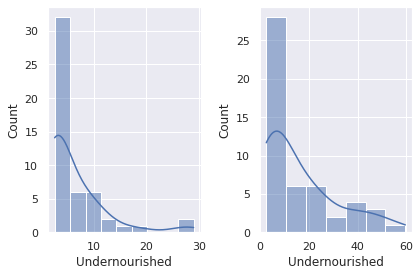

In [ ]:
# checking conditions
import seaborn as sns
sns.set()

# Random Condition
print("The 50 sample uses Python Random Sample generator to selected from each\
group")

# Independent Condition
if len(high) >= 30 and len(low) >= 30:
  print(True)
else:
  print("Condition check failed, we cannot conduct a 2 sample t test")

# Normal Conditions
fig, axs = plt.subplots(ncols=2)

sns.histplot(data = high, kde = True, ax=axs[0])
sns.histplot(data = low, kde = True, ax=axs[1])
fig.tight_layout()
plt.show()

In [ ]:
# calculate testing statistic
result = stats.ttest_ind(a=high, b=low, equal_var=True)
# stats.ttest_ind(a=group1, b=group2, equal_var=True)
 
# Print the result
print(result)

Ttest_indResult(statistic=-3.6938086836311506, pvalue=0.00036371014356256564)


Reference: \\
[Question 3 code] \\
How to conduct 2 sample t test by using python?
https://www.marsja.se/how-to-perform-a-two-sample-t-test-with-python-3-different-methods/

graphs: https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib

Random Sample: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html


### Q4: Does there appear to be a relationship between the number of deaths from COVID and the amount of intake from fat?


In [ ]:
df_fat_quantity = pd.read_csv(path_fat_quantity)
df_fat_quantity.columns = df_fat_quantity.columns.str.replace(' ', '_')
df_fat_quantity.describe()

,Alcoholic_Beverages,Animal_Products,Animal_fats,"Aquatic_Products,_Other",Cereals_-_Excluding_Beer,Eggs,"Fish,_Seafood",Fruits_-_Excluding_Wine,Meat,Miscellaneous,...,Treenuts,Vegetal_Products,Vegetable_Oils,Vegetables,Obesity,Confirmed,Deaths,Recovered,Active,Population
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,167.000000,164.000000,164.000000,164.000000,162.000000,1.700000e+02
mean,0.001035,20.695714,4.138451,0.000450,4.376548,0.953890,0.850437,0.542117,9.494279,0.056589,...,0.698955,29.304396,18.571657,0.309512,18.707784,2.021972,0.039370,1.452356,0.535158,4.452364e+07
std,0.009569,8.002713,3.287462,0.004039,3.183815,0.643957,0.924103,0.838286,4.666762,0.072633,...,0.814828,8.002369,6.766615,0.211766,9.633557,2.360454,0.048718,1.927617,1.329249,1.564182e+08
min,0.000000,5.018200,0.026200,0.000000,0.990800,0.058000,0.017400,0.037300,0.906100,0.000000,...,0.000000,13.098200,4.954900,0.026300,2.100000,0.000312,0.000000,0.000000,0.000000,5.400000e+04
25%,0.000000,14.885800,1.674225,0.000000,1.970150,0.411350,0.330975,0.239500,6.263575,0.010125,...,0.137350,23.133050,13.812825,0.173675,8.500000,0.140976,0.002013,0.099107,0.012028,2.816250e+06
50%,0.000000,20.943050,3.312350,0.000000,3.306750,0.898300,0.572700,0.361400,9.259000,0.031650,...,0.452400,29.060600,18.192550,0.247450,21.200000,1.011570,0.011998,0.475402,0.081040,1.018150e+07
75%,0.000000,26.866950,6.227575,0.000000,5.587600,1.276900,1.111625,0.577800,11.750450,0.076325,...,0.914025,35.117250,23.597300,0.362925,25.700000,3.487069,0.069503,2.622874,0.358183,3.271625e+07
max,0.097600,36.901800,14.937300,0.051100,18.376300,3.275600,8.406800,9.672700,26.429200,0.456100,...,4.975600,44.981800,36.418600,1.153800,45.600000,10.408199,0.185428,9.039871,8.019819,1.402385e+09


In [ ]:
df_fat_quantity.columns

Index(['Country', 'Alcoholic_Beverages', 'Animal_Products', 'Animal_fats',
       'Aquatic_Products,_Other', 'Cereals_-_Excluding_Beer', 'Eggs',
       'Fish,_Seafood', 'Fruits_-_Excluding_Wine', 'Meat', 'Miscellaneous',
       'Milk_-_Excluding_Butter', 'Offals', 'Oilcrops', 'Pulses', 'Spices',
       'Starchy_Roots', 'Stimulants', 'Sugar_Crops', 'Sugar_&_Sweeteners',
       'Treenuts', 'Vegetal_Products', 'Vegetable_Oils', 'Vegetables',
       'Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'Population', 'Unit_(all_except_Population)'],
      dtype='object')

In [ ]:
data = df_fat_quantity[['Alcoholic_Beverages', 'Animal_Products', 'Animal_fats',
       'Aquatic_Products,_Other', 'Cereals_-_Excluding_Beer', 'Eggs',
       'Fish,_Seafood', 'Fruits_-_Excluding_Wine', 'Meat',
       'Milk_-_Excluding_Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy_Roots', 'Stimulants', 'Sugar_Crops',
       'Sugar_&_Sweeteners', 'Treenuts', 'Vegetal_Products', 'Vegetable_Oils',
       'Vegetables','Deaths']]
data = data.dropna()
# Use the correlation matrix
corr = data.corr()

In [ ]:
corr['Deaths']

Alcoholic_Beverages        -0.081317
Animal_Products             0.441514
Animal_fats                 0.519321
Aquatic_Products,_Other    -0.084313
Cereals_-_Excluding_Beer   -0.377962
Eggs                        0.318535
Fish,_Seafood              -0.215378
Fruits_-_Excluding_Wine    -0.100925
Meat                        0.149132
Milk_-_Excluding_Butter     0.340141
Miscellaneous              -0.171116
Offals                     -0.195055
Oilcrops                   -0.360576
Pulses                     -0.297690
Spices                     -0.166468
Starchy_Roots              -0.277104
Stimulants                  0.299630
Sugar_Crops                -0.116621
Sugar_&_Sweeteners         -0.069747
Treenuts                    0.154666
Vegetal_Products           -0.441554
Vegetable_Oils             -0.105266
Vegetables                 -0.005396
Deaths                      1.000000
Name: Deaths, dtype: float64

Text(32.09374999999999, 0.5, 'Type of fat')

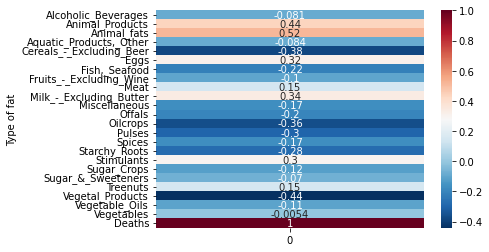

In [ ]:
y_axis_labels = ['Alcoholic_Beverages', 'Animal_Products', 'Animal_fats',
       'Aquatic_Products,_Other', 'Cereals_-_Excluding_Beer', 'Eggs',
       'Fish,_Seafood', 'Fruits_-_Excluding_Wine', 'Meat',
       'Milk_-_Excluding_Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy_Roots', 'Stimulants', 'Sugar_Crops',
       'Sugar_&_Sweeteners', 'Treenuts', 'Vegetal_Products', 'Vegetable_Oils',
       'Vegetables','Deaths']
sns.heatmap(corr['Deaths'].values.reshape(24,1),cmap="RdBu_r",
            annot=True, yticklabels=y_axis_labels)
plt.ylabel('Type of fat')

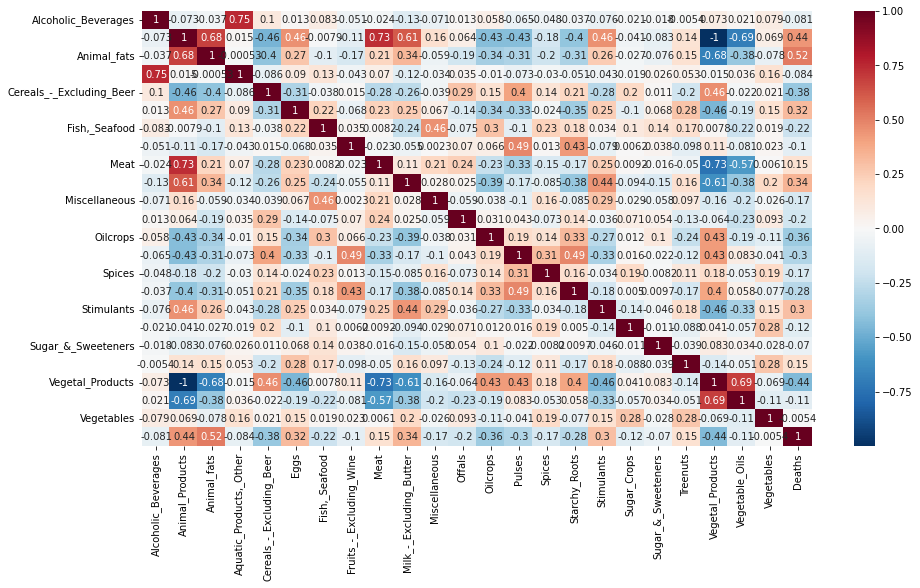

In [ ]:
sns.heatmap(corr,cmap="RdBu_r", annot=True)
plt.gcf().set_size_inches(15, 8)

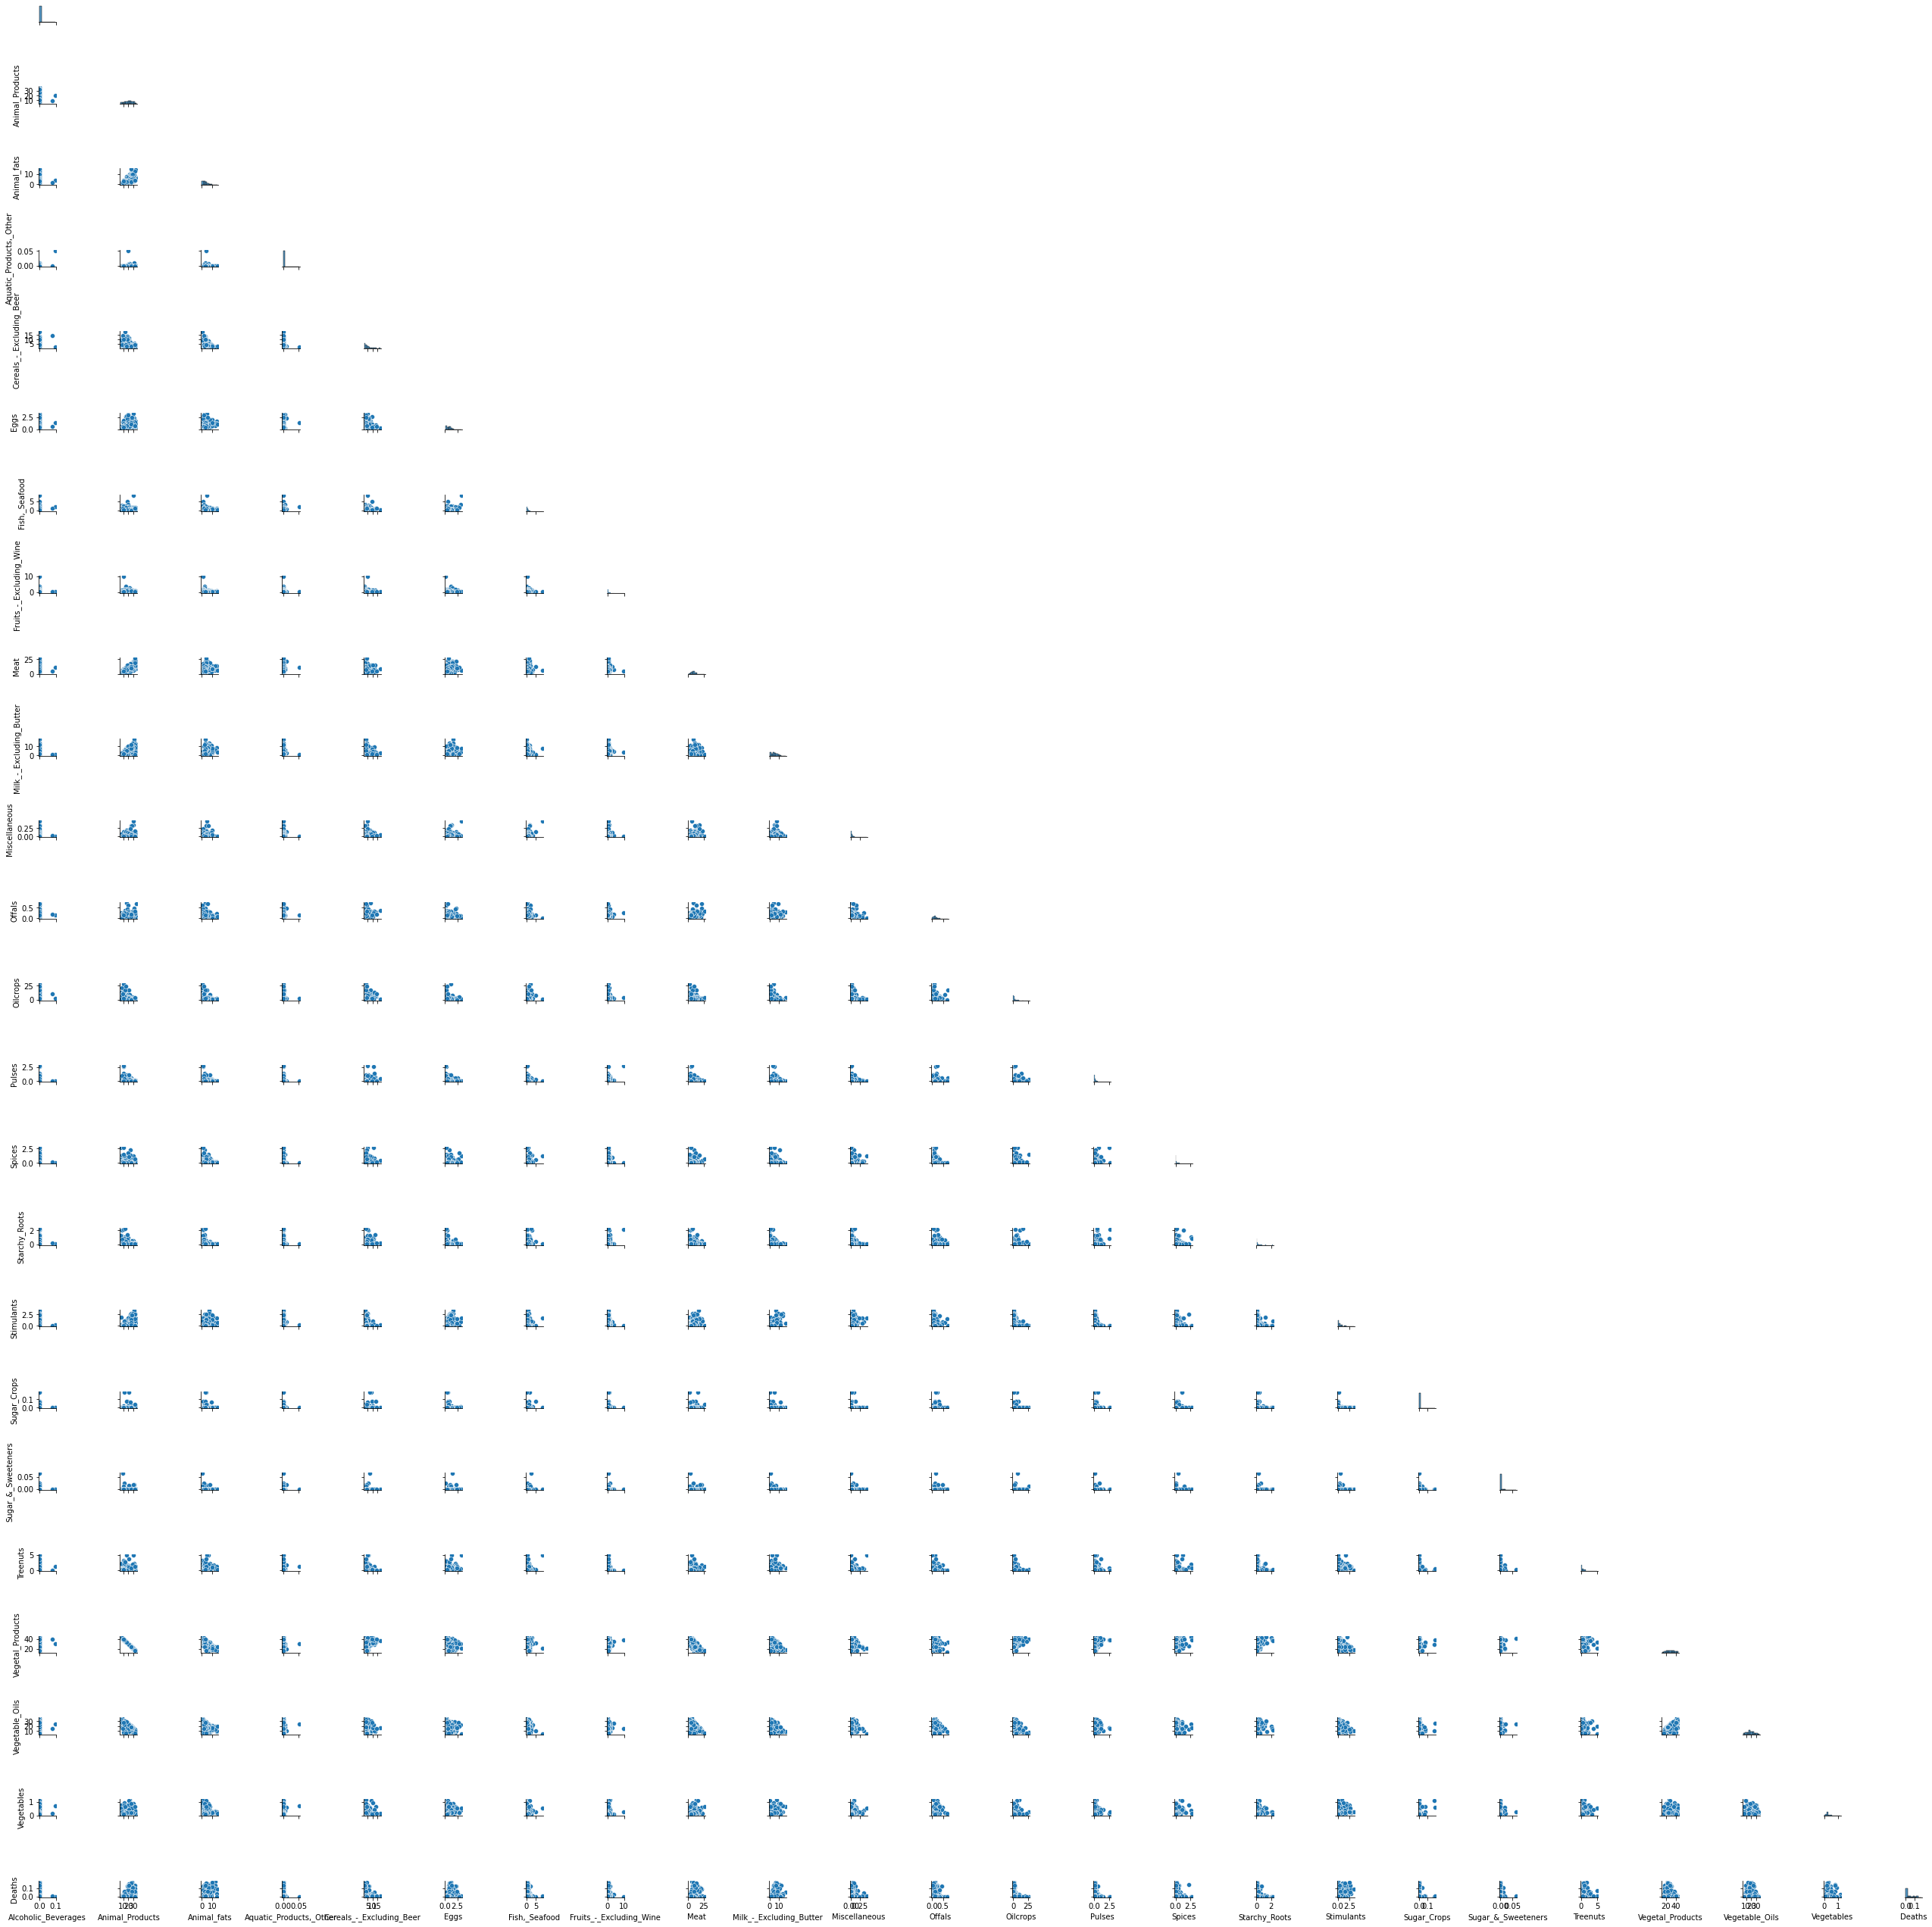

In [ ]:
sns.pairplot(data, height=1.5, corner=True)

In [ ]:
animal_fat = data['Animal_fats'].T
animal_product = data['Animal_Products'].T
cereal = data['Cereals_-_Excluding_Beer'].T
vegetal_products = data['Vegetal_Products'].T
death_r = data['Deaths'].T

In [ ]:
new = np.array([animal_fat, animal_product, cereal, vegetal_products, death_r])
new.shape

(5, 164)

In [ ]:
covMatrix = np.cov(new, bias=True)
print(covMatrix)

[[ 1.09177015e+01  1.80362208e+01 -4.30264620e+00 -1.80352002e+01
   8.33423992e-02]
 [ 1.80362208e+01  6.36630471e+01 -1.18430937e+01 -6.36605504e+01
   1.71100948e-01]
 [-4.30264620e+00 -1.18430937e+01  1.03412043e+01  1.18425187e+01
  -5.90334961e-02]
 [-1.80352002e+01 -6.36605504e+01  1.18425187e+01  6.36580722e+01
  -1.71109854e-01]
 [ 8.33423992e-02  1.71100948e-01 -5.90334961e-02 -1.71109854e-01
   2.35900530e-03]]


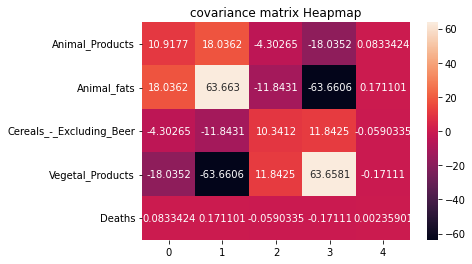

In [ ]:
y_axis_labels = ['Animal_Products', 'Animal_fats',
                 'Cereals_-_Excluding_Beer','Vegetal_Products',
                 'Deaths']
sns.heatmap(covMatrix, annot=True, fmt='g', yticklabels=y_axis_labels)
plt.title('covariance matrix Heapmap')
plt.show()

In [ ]:
deaths = data['Deaths']
animal_fat = data['Animal_fats']
df = [deaths, animal_fat]
df = pd.DataFrame(df)
df = df.T

Text(0.5, 1.0, 'AnimalFat vs Deaths')

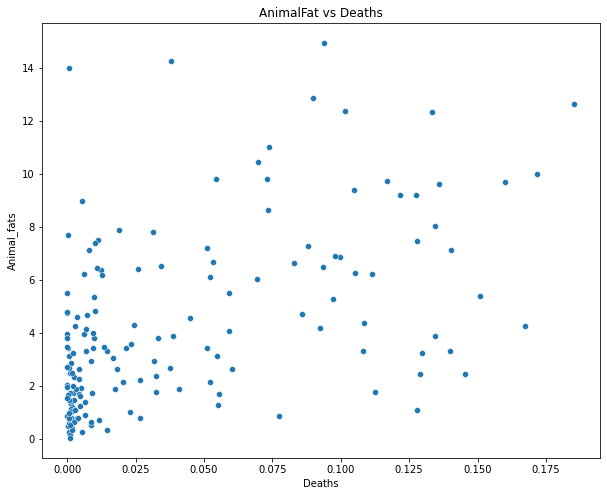

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(data=df, x="Deaths", y="Animal_fats")
plt.title('AnimalFat vs Deaths')

In [ ]:
country_animal_fat = px.bar(df_fat_quantity, x="Country",
                            y="Animal_fats").update_xaxes()
country_animal_fat.show()

In [ ]:
country_animal_fat = px.bar(df_fat_quantity, x="Country", 
                            y="Vegetal_Products").update_xaxes()
country_animal_fat.show()

In [ ]:
country_death = px.bar(df_fat_quantity, x="Country", y="Deaths").update_xaxes() 
country_death.show()

In [ ]:
pg.linear_regression(df[["Animal_fats","Vegetal_Products"]],
                     df["Deaths"])

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.152237,0.029294,5.196850,6.475595e-07,0.331943,0.323094,0.094358,0.210116
1,Animal_fats,0.041266,0.015043,2.743264,6.819910e-03,0.331943,0.323094,0.011545,0.070988
2,Vegetal_Products,-0.003214,0.000708,-4.542058,1.132230e-05,0.331943,0.323094,-0.004612,-0.001816


### Q5: Use multiple machine learning models to find the best tune model by comparing the predicted accuracy and mean squared error. Finding and predicting Wendy's diet habit’s recovery rate.

  Decision Tree

In [13]:
df_food_quantity = pd.read_csv(path_food_quantity)
df = df_food_quantity
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['Country', 'Alcoholic_Beverages', 'Animal_fats', 'Animal_Products',
       'Aquatic_Products,_Other', 'Cereals_-_Excluding_Beer', 'Eggs',
       'Fish,_Seafood', 'Fruits_-_Excluding_Wine', 'Meat',
       'Milk_-_Excluding_Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy_Roots', 'Stimulants', 'Sugar_&_Sweeteners',
       'Sugar_Crops', 'Treenuts', 'Vegetable_Oils', 'Vegetables',
       'Vegetal_Products', 'Obesity', 'Undernourished', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Population', 'Unit_(all_except_Population)'],
      dtype='object')

In [14]:
print(df.isnull().sum())

Country                         0
Alcoholic_Beverages             0
Animal_fats                     0
Animal_Products                 0
Aquatic_Products,_Other         0
Cereals_-_Excluding_Beer        0
Eggs                            0
Fish,_Seafood                   0
Fruits_-_Excluding_Wine         0
Meat                            0
Milk_-_Excluding_Butter         0
Miscellaneous                   0
Offals                          0
Oilcrops                        0
Pulses                          0
Spices                          0
Starchy_Roots                   0
Stimulants                      0
Sugar_&_Sweeteners              0
Sugar_Crops                     0
Treenuts                        0
Vegetable_Oils                  0
Vegetables                      0
Vegetal_Products                0
Obesity                         3
Undernourished                  7
Confirmed                       6
Deaths                          6
Recovered                       6
Active        

In [15]:
df = df.dropna()

In [16]:
from sklearn.model_selection import train_test_split
data = df[['Alcoholic_Beverages', 'Animal_fats', 'Animal_Products',
       'Aquatic_Products,_Other', 'Cereals_-_Excluding_Beer', 'Eggs',
       'Fish,_Seafood', 'Fruits_-_Excluding_Wine', 'Meat',
       'Milk_-_Excluding_Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy_Roots', 'Stimulants', 'Sugar_&_Sweeteners',
       'Sugar_Crops', 'Treenuts', 'Vegetable_Oils', 'Vegetables',
       'Vegetal_Products', 'Recovered']]

In [17]:
# decision tree regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

#scaler = StandardScaler()
#data = scaler.fit_transform(data)

X = df[['Alcoholic_Beverages', 'Animal_fats', 'Animal_Products',
       'Aquatic_Products,_Other', 'Cereals_-_Excluding_Beer', 'Eggs',
       'Fish,_Seafood', 'Fruits_-_Excluding_Wine', 'Meat',
       'Milk_-_Excluding_Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy_Roots', 'Stimulants', 'Sugar_&_Sweeteners',
       'Sugar_Crops', 'Treenuts', 'Vegetable_Oils', 'Vegetables',
       'Vegetal_Products']]
y = df['Recovered']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
# size of train data set
X_train.shape

(107, 23)

In [ ]:
# size of test data set
X_test.shape

(47, 23)

In [ ]:
reg_decision_model = DecisionTreeRegressor()

# fit independent varaibles to the dependent variables
reg_decision_model.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
reg_decision_model.score(X_train,y_train)

1.0

In [ ]:
reg_decision_model.score(X_test,y_test)

-0.24455965232483234

In [ ]:
prediction = reg_decision_model.predict(X_test)

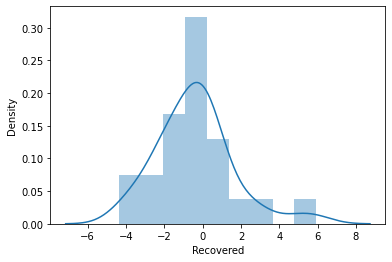

In [ ]:
# checking difference between labled y and predicted y
sns.distplot(y_test-prediction)

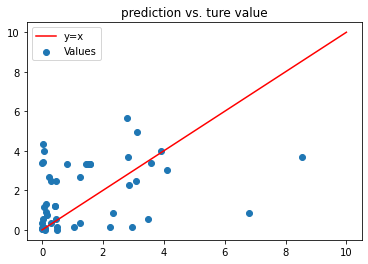

In [ ]:
x = np.linspace(0, 10, 10)
y2 = x
fig, ax = plt.subplots()
ax.scatter(y_test, prediction)
plt.title('prediction vs. ture value')
ax.plot(x, y2, color='red')
ax.legend(['y=x', 'Values'])

In [ ]:
from sklearn.metrics import mean_squared_error

print('MSE:', mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))
print('accuracy score:', reg_decision_model.score(X_test,y_test))

MSE: 4.170436138299242
RMSE: 2.042164571796123
accuracy score: -0.24455965232483234


Hyperparameter tuning

In [ ]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [ ]:
# calculating different regression metrics

from sklearn.model_selection import GridSearchCV

In [ ]:
tuning_model = GridSearchCV(reg_decision_model,
                            param_grid=parameters,scoring='neg_mean_squared_error',
                            cv=3,verbose=3)

In [ ]:
tuning_model.fit(X, y)

Streaming output truncated to the last 5000 lines.
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-3.691 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.4, splitter=random;, score=-3.079 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-2.973 total time=   0.0s
[CV 2/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-3.959 total time=   0.0s
[CV 3/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, splitter=best;, score=-3.481 total time=   0.0s
[CV 1/3] END max_depth=12, max_features=None, max_leaf_nodes=None, min_samples_leaf=8, min_weight_fraction_leaf=0.5, spl

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
# best hyperparameters 
tuning_model.best_params_

{'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': 40,
 'min_samples_leaf': 5,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'random'}

Training Decision Tree With Best Hyperparameters

In [ ]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=5, max_features=None, 
                                         max_leaf_nodes=40, min_samples_leaf=5,
                                         min_weight_fraction_leaf=0.1,
                                         splitter='random')

In [ ]:
tuned_hyper_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=40, min_samples_leaf=5,
                      min_weight_fraction_leaf=0.1, splitter='random')

In [ ]:
tuned_pred = tuned_hyper_model.predict(X_test)

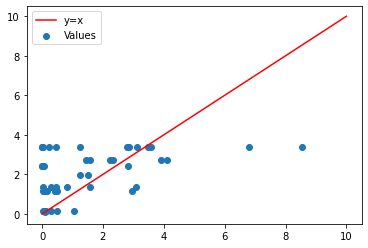

In [ ]:
x = np.linspace(0, 10, 10)
y2 = x
fig, ax = plt.subplots()
ax.plot(x, y2, color='red')
ax.scatter(y_test, tuned_pred)
ax.legend(['y=x', 'Values'])

In [ ]:
# With hyperparameter tuned 

from sklearn.metrics import mean_squared_error

print('MSE:', mean_squared_error(y_test, tuned_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, tuned_pred)))
print('accuracy score:', tuned_hyper_model.score(X_test,y_test))

MSE: 3.073229627619313
RMSE: 1.7530629274556326
accuracy score: 0.08287347653186317


Random Forest + hyperparameter tuning

In [10]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
# maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 50, cv = 3, verbose=2, random_state=0, n_jobs = -1)

In [20]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=0, verbose=2)

In [21]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')


Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 20, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': True}  



In [22]:
best_rf = RandomForestRegressor(n_estimators = 20, min_samples_split = 10,
                                min_samples_leaf= 4, max_features = 'auto',
                                max_depth= 40, bootstrap=True) 
best_rf.fit(X_train, y_train) 

RandomForestRegressor(max_depth=40, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=20)

In [23]:
y_pred_rf =  best_rf.predict(X_test)
print(y_pred_rf)

[1.51789473 1.19275042 0.94593971 1.57453181 2.95270414 2.10452916
 1.11411056 1.16141803 1.35720216 1.63809014 2.15078575 1.06664668
 0.33108907 1.44494401 2.47282352 1.14758213 0.63073371 0.17656416
 3.00134845 1.18762414 1.69918204 0.95461525 0.63045888 0.65866078
 2.29058073 1.19644256 1.5831889  0.08201419 1.0553211  1.2496303
 1.24403028 2.64133305 1.13312533 2.26064344 1.56029134 0.46741994
 2.05205518 3.06625551 1.03352153 2.75500078 1.04166898 0.79905082
 0.77996118 1.34540005 0.22158788 0.43013464 1.62335345]


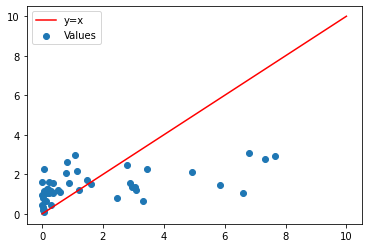

In [24]:
x = np.linspace(0, 10, 10)
y2 = x
fig, ax = plt.subplots()
ax.plot(x, y2, color='red')
ax.scatter(y_test, y_pred_rf)
ax.legend(['y=x', 'Values'])

In [27]:
print('MSE:', mean_squared_error(y_test, y_pred_rf))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print('accuracy score:', best_rf.score(X_test,y_test))

MSE: 3.6061338216070937
RMSE: 1.8989823120837892
accuracy score: 0.23386092370459166


Predict myself

In [ ]:
myself = [3.5, 0.2212, 12, 0, 8.0666, 0.7792, 3.275, 4.8723, 5.8477, 2.2041,
          4.302, 0.1704, 0.9734, 0.6391, 0.1565,4.0812, 0.1721, 5.3344,
          0, 0.0852, 0.8677, 5.4725, 37.5167]
myself = pd.DataFrame(myself)

In [ ]:
myself.columns =["Wendy's"]
myself.index = ['Alcoholic_Beverages', 'Animal_fats', 'Animal_Products',
       'Aquatic_Products,_Other', 'Cereals_-_Excluding_Beer', 'Eggs',
       'Fish,_Seafood', 'Fruits_-_Excluding_Wine', 'Meat',
       'Milk_-_Excluding_Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy_Roots', 'Stimulants', 'Sugar_&_Sweeteners',
       'Sugar_Crops', 'Treenuts', 'Vegetable_Oils', 'Vegetables',
       'Vegetal_Products']

print(myself)

                          Wendy's
Alcoholic_Beverages        3.5000
Animal_fats                0.2212
Animal_Products           12.0000
Aquatic_Products,_Other    0.0000
Cereals_-_Excluding_Beer   8.0666
Eggs                       0.7792
Fish,_Seafood              3.2750
Fruits_-_Excluding_Wine    4.8723
Meat                       5.8477
Milk_-_Excluding_Butter    2.2041
Miscellaneous              4.3020
Offals                     0.1704
Oilcrops                   0.9734
Pulses                     0.6391
Spices                     0.1565
Starchy_Roots              4.0812
Stimulants                 0.1721
Sugar_&_Sweeteners         5.3344
Sugar_Crops                0.0000
Treenuts                   0.0852
Vegetable_Oils             0.8677
Vegetables                 5.4725
Vegetal_Products          37.5167


In [ ]:
my_rate = tuned_hyper_model.predict(myself.T)
print("Wendy's Recovery rate: " + str(my_rate) + '%')

Wendy's Recovery rate: [1.35789416]%


In [ ]:
# find the median of all countries' recovery rate
medians=y.median()
print("medians of Recovery rate: " + str(medians) + '%')


medians of Recovery rate: 0.4769941136691255%
